In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
df_2016 = pd.read_csv('2016_Call_a_bike.csv')

In [3]:
df_2016.count()

date                         5702575
BOOKING_HAL_ID               5702575
CATEGORY_HAL_ID              5702575
VEHICLE_HAL_ID               5702575
CUSTOMER_HAL_ID              5702575
DATE_BOOKING                 5702575
DATE_FROM                    5702575
DATE_UNTIL                   5702575
COMPUTE_EXTRA_BOOKING_FEE    5702575
TRAVERSE_USE                 5702575
DISTANCE                     5702567
START_RENTAL_ZONE            4540382
START_RENTAL_ZONE_HAL_ID     5422863
END_RENTAL_ZONE              4529526
END_RENTAL_ZONE_HAL_ID       5420375
RENTAL_ZONE_HAL_SRC          5598819
CITY_RENTAL_ZONE             5702575
TECHNICAL_INCOME_CHANNEL     5639061
dtype: int64

In [4]:
df_2016.head()

,date,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,2016-01-01 00:44:49,34948004,51000,108647,0BFC9CA3CA75AEAE16A6BF86913AF5D8613B20BD,2016-01-01 00:44:49,2016-01-01 00:44:49,2016-01-01 01:13:37,Nein,Nein,0.0,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Standort,Hamburg,Android SRH
1,2016-01-01 00:31:46,34947949,51000,108371,48A88184B22E7171E8A03E34FF32E761DD83CA92,2016-01-01 00:31:46,2016-01-01 00:31:46,2016-01-01 00:58:49,Nein,Nein,0.0,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Standort,Hamburg,iPhone SRH
2,2016-01-01 00:38:37,34947974,51000,119829,F84BCAB7154C63B9E4A7E7EA13BB4FA493539A12,2016-01-01 00:38:37,2016-01-01 00:38:37,2016-01-01 00:49:50,Nein,Nein,0.0,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Standort,Hamburg,iPhone CAB
3,2016-01-01 01:11:00,34948134,51000,116810,7D8127DA8F382BF2C3A8FD31202D46A150A513AE,2016-01-01 01:11:00,2016-01-01 01:11:00,2016-01-01 02:26:23,Nein,Nein,0.0,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Standort,Hamburg,Terminal HH_72 (-2369-)
4,2016-01-01 01:06:17,34948107,51000,120345,AEE37262F04CB04681868F6E8CEE2D7F9CDA6997,2016-01-01 01:06:17,2016-01-01 01:06:17,2016-01-01 01:15:16,Nein,Nein,0.0,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Standort,Hamburg,Android SRH


In [5]:
df_2016.drop(['COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE', 'BOOKING_HAL_ID', 'CUSTOMER_HAL_ID'], axis=1, inplace=True)

In [6]:
CITY = df_2016.CITY_RENTAL_ZONE.unique()

In [7]:
category = df_2016.CATEGORY_HAL_ID.unique()

In [8]:
df_2016.head()

,date,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,2016-01-01 00:44:49,51000,108647,2016-01-01 00:44:49,2016-01-01 00:44:49,2016-01-01 01:13:37,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Standort,Hamburg,Android SRH
1,2016-01-01 00:31:46,51000,108371,2016-01-01 00:31:46,2016-01-01 00:31:46,2016-01-01 00:58:49,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Standort,Hamburg,iPhone SRH
2,2016-01-01 00:38:37,51000,119829,2016-01-01 00:38:37,2016-01-01 00:38:37,2016-01-01 00:49:50,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Standort,Hamburg,iPhone CAB
3,2016-01-01 01:11:00,51000,116810,2016-01-01 01:11:00,2016-01-01 01:11:00,2016-01-01 02:26:23,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Standort,Hamburg,Terminal HH_72 (-2369-)
4,2016-01-01 01:06:17,51000,120345,2016-01-01 01:06:17,2016-01-01 01:06:17,2016-01-01 01:15:16,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Standort,Hamburg,Android SRH


In [9]:
print(len(CITY))
print(len(category))

46
4


In [10]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(df_2016[df_2016['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])

In [11]:
print(city_dict)

{'Hamburg': 3044382, 'Kassel': 171786, 'Darmstadt': 244063, 'Frankfurt am Main': 911954, 'Marburg': 187279, 'Berlin': 334049, 'Stuttgart': 169310, 'Köln': 232085, 'München': 349944, 'Wiesbaden': 17025, 'Rüsselsheim': 30378, 'Weimar': 61, 'Mannheim': 270, 'Karlsruhe': 322, 'Bonn': 366, 'Halle': 906, 'Lübeck': 138, 'Baden-Baden': 821, 'Bamberg': 104, 'Göttingen': 344, 'Flugh. Frankfurt': 3084, 'Oberhausen': 24, 'Freiburg': 229, 'Kiel': 1135, 'Würzburg': 126, 'Erlangen': 62, 'Düsseldorf': 232, 'Fulda': 67, 'Troisdorf': 295, 'Oldenburg (Oldb)': 29, 'Heidelberg': 282, 'Warnemünde': 31, 'Gütersloh': 20, 'Bremen': 232, 'Mainz': 171, 'Saarbrücken': 86, 'Hannover': 387, 'Aschaffenburg': 67, 'Rostock': 54, 'Hanau': 77, 'Ingolstadt': 51, 'Braunschweig': 81, 'Magdeburg': 84, 'Kaiserslautern': 35, 'Bielefeld': 41, 'Hennef': 6}


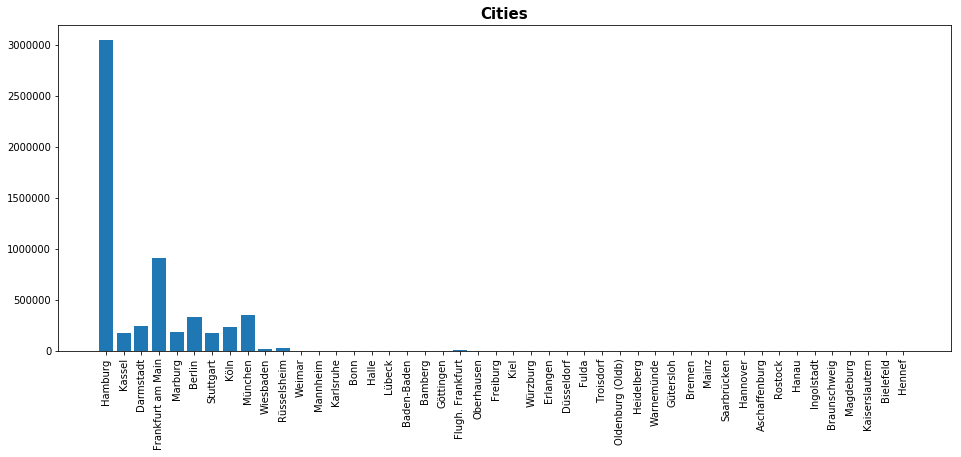

In [12]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()

In [13]:
category_dict = {}
categories, category_count = [],[]
for c in category:
    category_dict[c] = len(df_2016[df_2016['CATEGORY_HAL_ID']==c])
    categories.append(c)
    category_count.append(category_dict[c])

In [14]:
print(category_dict)

{51000: 3044382, 53000: 171786, 50000: 2465954, 50001: 20453}


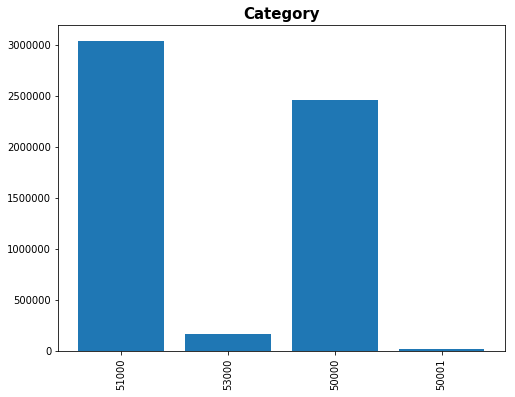

In [15]:
x_plot = np.arange(len(categories))
plt.figure(figsize=(8,6))
plt.title('Category', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, category_count)
plt.xticks(x_plot+1, categories, rotation = 'vertical')
plt.show()

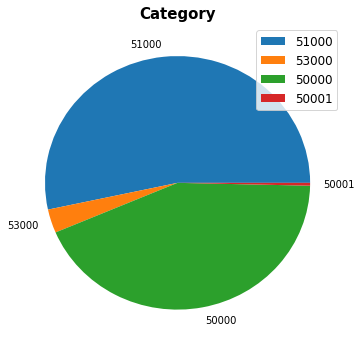

In [16]:
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(5,5))
plt.title('Category', fontsize=15, fontweight='bold')
plt.pie(category_count, labels=categories)
plt.legend(categories, fontsize = 'large', loc = "best")
plt.tight_layout()
plt.show()

In [17]:
del df_2016['date']
df_2016.head()

,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,51000,108647,2016-01-01 00:44:49,2016-01-01 00:44:49,2016-01-01 01:13:37,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Standort,Hamburg,Android SRH
1,51000,108371,2016-01-01 00:31:46,2016-01-01 00:31:46,2016-01-01 00:58:49,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Standort,Hamburg,iPhone SRH
2,51000,119829,2016-01-01 00:38:37,2016-01-01 00:38:37,2016-01-01 00:49:50,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Standort,Hamburg,iPhone CAB
3,51000,116810,2016-01-01 01:11:00,2016-01-01 01:11:00,2016-01-01 02:26:23,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Standort,Hamburg,Terminal HH_72 (-2369-)
4,51000,120345,2016-01-01 01:06:17,2016-01-01 01:06:17,2016-01-01 01:15:16,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Standort,Hamburg,Android SRH


In [18]:
df_2016['DATE_BOOKING'] = pd.to_datetime(df_2016['DATE_BOOKING'])

In [19]:
df_2016.index = df_2016['DATE_BOOKING']
df_2016.head()

,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
DATE_BOOKING,,,,,,,,,,,,
2016-01-01 00:44:49,51000,108647,2016-01-01 00:44:49,2016-01-01 00:44:49,2016-01-01 01:13:37,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Standort,Hamburg,Android SRH
2016-01-01 00:31:46,51000,108371,2016-01-01 00:31:46,2016-01-01 00:31:46,2016-01-01 00:58:49,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Standort,Hamburg,iPhone SRH
2016-01-01 00:38:37,51000,119829,2016-01-01 00:38:37,2016-01-01 00:38:37,2016-01-01 00:49:50,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Standort,Hamburg,iPhone CAB
2016-01-01 01:11:00,51000,116810,2016-01-01 01:11:00,2016-01-01 01:11:00,2016-01-01 02:26:23,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Standort,Hamburg,Terminal HH_72 (-2369-)
2016-01-01 01:06:17,51000,120345,2016-01-01 01:06:17,2016-01-01 01:06:17,2016-01-01 01:15:16,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Standort,Hamburg,Android SRH


In [20]:
df_month = df_2016.groupby(pd.TimeGrouper(freq='M'))

In [21]:
tem = df_month['DATE_BOOKING'].count()

In [22]:
month_name=[]
month_wise_booking=[]
for p,l in tem.items():
    month_name.append(calendar.month_abbr[p.month])
    month_wise_booking.append(l)

In [23]:
print(month_name)
print(month_wise_booking)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[229704, 262906, 310640, 495376, 649252, 671084, 691377, 670195, 665214, 451581, 340488, 264758]


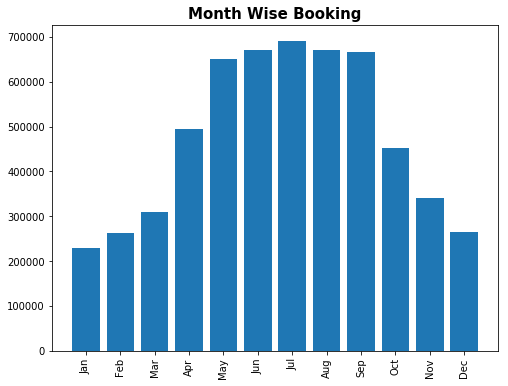

In [24]:
x_plot = np.arange(len(month_name))
plt.figure(figsize=(8,6))
plt.title('Month Wise Booking', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_wise_booking)
plt.xticks(x_plot+1, month_name, rotation = 'vertical')
plt.show()

In [25]:
df_2016.count()

CATEGORY_HAL_ID             5702575
VEHICLE_HAL_ID              5702575
DATE_BOOKING                5702575
DATE_FROM                   5702575
DATE_UNTIL                  5702575
START_RENTAL_ZONE           4540382
START_RENTAL_ZONE_HAL_ID    5422863
END_RENTAL_ZONE             4529526
END_RENTAL_ZONE_HAL_ID      5420375
RENTAL_ZONE_HAL_SRC         5598819
CITY_RENTAL_ZONE            5702575
TECHNICAL_INCOME_CHANNEL    5639061
dtype: int64

In [26]:
df = df_2016.dropna(subset = ['TECHNICAL_INCOME_CHANNEL'],how='any', axis=0)

In [27]:
df.count()

CATEGORY_HAL_ID             5639061
VEHICLE_HAL_ID              5639061
DATE_BOOKING                5639061
DATE_FROM                   5639061
DATE_UNTIL                  5639061
START_RENTAL_ZONE           4490674
START_RENTAL_ZONE_HAL_ID    5362018
END_RENTAL_ZONE             4480063
END_RENTAL_ZONE_HAL_ID      5359256
RENTAL_ZONE_HAL_SRC         5536141
CITY_RENTAL_ZONE            5639061
TECHNICAL_INCOME_CHANNEL    5639061
dtype: int64

In [28]:
channel = df['TECHNICAL_INCOME_CHANNEL']

In [29]:
channel_group = {'android':[], 'iphone': [], 'windows': [], 'other': []}
for j in channel:
    if ('Android' in j):
        channel_group['android'].append(j)
    elif ('iPhone' in j):
        channel_group['iphone'].append(j)
    elif ('Windows' in j):
        channel_group['windows'].append(j)
    else:
        channel_group['other'].append(j)

In [30]:
groups, group_count = [],[]
for i in channel_group:
    groups.append(i)
    group_count.append(len(channel_group[i]))
print(groups)
print(group_count)

['android', 'iphone', 'windows', 'other']
[1577471, 2059359, 68735, 1933496]


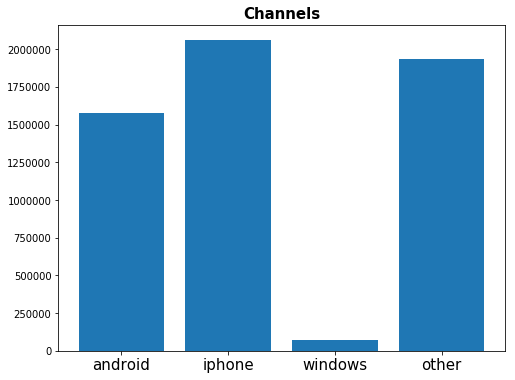

In [31]:
x_plot = np.arange(len(groups))
plt.figure(figsize=(8,6))
plt.title('Channels', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, group_count)
plt.xticks(x_plot+1, groups, fontsize=15)
plt.show()